In [1]:
import torch
import pandas as pd

In [2]:
cd ..

/home/yann/IVISpaces


In [3]:
from Data import get_setup

In [4]:
FBNN={'boston': {('FBNN', 'RMSE'): 2.378, ('FBNN', 'LPP'): -2.301},
      'concrete': {('FBNN', 'RMSE'): 4.935, ('FBNN', 'LPP'): -3.096},
      'energy': {('FBNN', 'RMSE'): 0.412, ('FBNN', 'LPP'): -0.684},
      'wine': {('FBNN', 'RMSE'): 0.673, ('FBNN', 'LPP'): -1.040},
      'yacht': {('FBNN', 'RMSE'): 0.607, ('FBNN', 'LPP'): -1.033},
     'navalC':{('FBNN', 'RMSE'): 0.00012, ('FBNN', 'LPP'): 7.130},
     'protein':{('FBNN', 'RMSE'): 4.326, ('FBNN', 'LPP'): -2.892},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }
sFBNN={'boston': {('FBNN', 'RMSE'): 0.104, ('FBNN', 'LPP'): 0.038},
      'concrete': {('FBNN', 'RMSE'): 0.180, ('FBNN', 'LPP'): 0.016},
      'energy': {('FBNN', 'RMSE'): 0.017, ('FBNN', 'LPP'): 0.020},
      'wine': {('FBNN', 'RMSE'): 0.014, ('FBNN', 'LPP'): 0.013},
      'yacht': {('FBNN', 'RMSE'): 0.068, ('FBNN', 'LPP'): 0.033},
      'navalC':{('FBNN', 'RMSE'): 0.0000, ('FBNN', 'LPP'): 0.024},
     'protein':{('FBNN', 'RMSE'): 0.019, ('FBNN', 'LPP'): 0.004},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }

# Experiment 1 #

## metrics on test #

In [6]:
RESULTS=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_metrics.pt')

In [6]:
methods=['HMC','NN-HyVI','FuNN-HyVI']#torch.distributions.kl.kl_divergence(middle,certain)#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']
index_rmse=pd.MultiIndex.from_product([methods,['RMSE']])
index_lpp=pd.MultiIndex.from_product([methods,['LPP']])


In [7]:
df_rmse=pd.DataFrame(RESULTS[0], index=index_rmse).transpose()
df_rmse_std=pd.DataFrame(RESULTS[1], index=index_rmse).transpose()
df_lpp=pd.DataFrame(RESULTS[0], index=index_lpp).transpose()
df_lpp_std=pd.DataFrame(RESULTS[1], index=index_lpp).transpose()

In [8]:
import numpy as np

for i in df_rmse.columns:
    df_rmse[i] = df_rmse[i].round(3).astype(str)+ "±" + ((df_rmse_std[i]/np.sqrt(3)).round(3)).astype(str)+""
for i in df_lpp.columns:
    df_lpp[i] = df_lpp[i].round(3).astype(str)+ "±" + ((df_lpp_std[i]/np.sqrt(3)).round(5)).astype(str)+""
    

In [9]:
print(df_rmse.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &      NN-HyVI &    FuNN-HyVI \\
{} &       RMSE &         RMSE &         RMSE \\
\midrule
boston   &  0.286±nan &  0.289±0.003 &  0.322±0.038 \\
concrete &  0.413±nan &  0.348±0.005 &  0.332±0.016 \\
energy   &  0.264±nan &  0.071±0.004 &    0.048±0.0 \\
wine     &  0.723±nan &  0.856±0.041 &  0.877±0.013 \\
yacht    &  0.251±nan &  0.083±0.001 &  0.066±0.005 \\
\bottomrule
\end{tabular}



In [10]:
print(df_lpp.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &         NN-HyVI &       FuNN-HyVI \\
{} &         LPP &             LPP &             LPP \\
\midrule
boston   &  -1.882±nan &  -1.844±0.00013 &  -1.849±0.00301 \\
concrete &  -2.443±nan &  -2.427±0.00019 &  -2.426±0.00031 \\
energy   &  -1.301±nan &  -1.258±0.00037 &    -1.256±1e-05 \\
wine     &  -1.117±nan &  -1.629±0.12349 &  -1.756±0.04499 \\
yacht    &  -1.326±nan &  -1.259±0.00023 &   -1.257±0.0003 \\
\bottomrule
\end{tabular}



## Predictive epistemic entropy

In [16]:
Entropy_=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_pred_entropy.pt')

methods=['HMC','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])


df=pd.DataFrame(data=Entropy_, index=methods)
Entropy=df.to_dict()


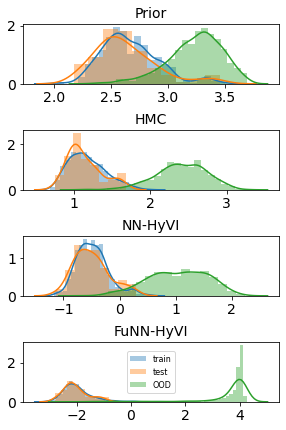

In [17]:
from Metrics import batch_entropy_nne
from torch import nn
from Models import get_mlp
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 14,
              'xtick.labelsize' : 14,
              'ytick.labelsize' : 14,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_methods=len(methods)+1
fig,ax=plt.subplots(n_methods,1,figsize=(4,6),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

split_nb=0
label=['train', 'test', 'OOD']
dataset, dic ='concrete', Entropy['concrete']
m=0
setup_ = get_setup(dataset)
setup=setup_.Setup(device)
x_train, y_train=setup.train_data()
x_test, y_test=setup.test_data()


input_dim=x_train.shape[1]
param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
prior_theta=0.5*torch.randn(1000,param_count).to(device)

X=[x_train,x_test,OOD_sampler(x_train,1000)]
Y=[model(x,prior_theta) for x in X]

H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

ax_=ax.flat
for i in range(len(H)):
    sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
#ax_[0].set_ylabel('Prior',{'fontstyle':'italic'})
ax_[0].set_title('Prior')

#ax_[m].set_title(dataset)

m+=1
for method, Hs in dic.items():
    
    H=Hs[split_nb]
    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
    if method=='FuNNeVI' or method== 'GeNNeVI':
        #ax_[m].set_ylabel(method, {'fontweight':'bold'})
        ax_[m].set_title(method)
    else:
        #ax_[m].set_ylabel(method)
        ax_[m].set_title(method)

    m+=1

#handles, labels = ax_[0].get_legend_handles_labels()

#fig.legend(handles, labels, title='input distribution',title_fontsize=10,  loc=(.75,0.1),prop={'size': 10})
ax_[m-1].legend(loc='center', prop={'size': 8})
fig.tight_layout(pad=0.8)
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp1_{}.pdf".format(dataset), dpi=600)

plt.show()

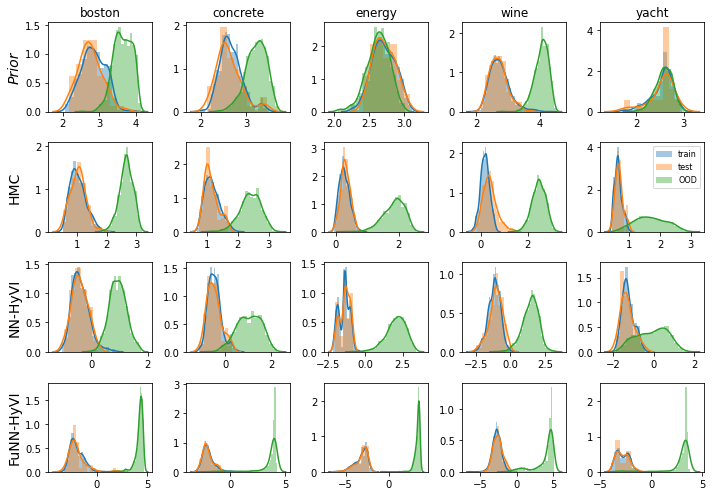

In [18]:
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=5
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,7),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']

d=0
for dataset, dic in Entropy.items():# ='boston', Entropy['boston']
    m=0

    setup_ = get_setup(dataset)
    setup=setup_.Setup(device)
    x_train, y_train=setup.train_data()
    x_test, y_test=setup.test_data()


    input_dim=x_train.shape[1]
    param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
    prior_theta=0.5*torch.randn(1000,param_count).to(device)

    X=[x_train,x_test,OOD_sampler(x_train,1000)]
    Y=[model(x,prior_theta) for x in X]

    H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax[0,d])
    ax[0,0].set_ylabel('Prior',{'fontstyle':'italic'})
    #ax_[0].set_title('Prior')

    ax[0,d].set_title(dataset)

    m+=1
    for method, Hs in dic.items():
        H=Hs[0]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d])        
        if d==0:
            if method=='FuNNeVI' or method== 'GeNNeVI':
                ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
            else:
                ax[m,d].set_ylabel(method_names[m-1])

        m+=1
    d+=1
ax[1,d-1].legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp1.pdf", dpi=600)

plt.show()

## ROC AUC

In [63]:
Entropy_=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_pred_entropy.pt')

methods=['HMC','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])


df=pd.DataFrame(data=Entropy_, index=methods)
Entropy=df.to_dict()


In [64]:
import copy
AUC=copy.deepcopy(Entropy)


In [65]:
import numpy as np
from sklearn.metrics import roc_auc_score
nb_splits=3
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        AUCs=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            AUCs.append(roc_auc_score(y_true.cpu(),y_score.cpu()))
        AUC[dataset][method]=np.mean(AUCs)

In [67]:
pd.options.display.precision=3
df=pd.DataFrame(AUC).transpose().round(3)
df.style.highlight_max(axis=1)

,HMC,NN-HyVI,FuNN-HyVI
boston,1.000,0.996,1.000
concrete,0.996,0.993,0.997
energy,1.000,1.000,1.000
wine,1.000,0.999,1.000
yacht,0.990,0.909,0.983


In [20]:
import copy
accuracy_test=copy.deepcopy(Entropy)
accuracy_OOD=copy.deepcopy(Entropy)

In [21]:
import numpy as np
nb_splits=3
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        acc_test=[]
        acc_ood=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            threshold=H[0].max()
            count_test=(H[1] > threshold).sum().item()
            count_ood=(H[2] > threshold).sum().item()
            acc_test.append(np.true_divide(count_test,len(H[1])))
            acc_ood.append(np.true_divide(count_ood,len(H[2])))
        accuracy_test[dataset][method]=np.mean(acc_test),np.std(acc_test)/np.sqrt(nb_splits)
        accuracy_OOD[dataset][method]=np.mean(acc_ood),np.std(acc_ood)/np.sqrt(nb_splits)

In [11]:
pd.DataFrame(accuracy_OOD).transpose()

,HMC,NN-HyVI,FuNN-HyVI
boston,"(0.9933333333333333, 0.0007200822998230963)","(0.5016666666666666, 0.04419736878375689)","(0.999, 0.0004714045207910322)"
concrete,"(0.852, 0.010624918300339495)","(0.7963333333333334, 0.0019051586888313627)","(0.9653333333333333, 0.00751787992179435)"
energy,"(0.9939999999999999, 0.0004714045207910322)","(0.9976666666666666, 0.0002721655269759089)","(1.0, 0.0)"
wine,"(1.0, 0.0)","(0.961, 0.002494438257849297)","(0.9893333333333333, 0.0014401645996461926)"
yacht,"(0.92, 0.0030912061651652374)","(0.647, 0.006531972647421815)","(0.96, 0.0009428090415820644)"


In [12]:
pd.DataFrame(accuracy_test).transpose()

,HMC,NN-HyVI,FuNN-HyVI
boston,"(0.0, 0.0)","(0.0, 0.0)","(0.0196078431372549, 0.0)"
concrete,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
energy,"(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
wine,"(0.14166666666666664, 0.004500514373894345)","(0.004166666666666667, 0.003402069087198859)","(0.0, 0.0)"
yacht,"(0.0, 0.0)","(0.0, 0.0)","(0.01075268817204301, 0.00877953312825512)"


In [13]:
import copy
TPRs=copy.deepcopy(Entropy)
FNRs=copy.deepcopy(Entropy)
THRESHs=copy.deepcopy(Entropy)

In [14]:
import numpy as np
nb_splits=3
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        TPR=[] #on in-distirbution
        FNR=[] #on OOD
        THRESH=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            H_pos=torch.cat([H[0],H[1]])
            thresholds=torch.linspace(H[0].min().item(),H[2].max().item(),500).to(device)
            TruePositive=(H_pos< thresholds.unsqueeze(-1)).sum(1).true_divide(len(H_pos))
            FalseNegative=(H[2] < thresholds.unsqueeze(-1)).sum(1).true_divide(len(H[2]))
            TPR.append(TruePositive)
            FNR.append(FalseNegative)
            THRESH.append(thresholds)
        TPRs[dataset][method]=TPR
        FNRs[dataset][method]=FNR#
        THRESHs[dataset][method]=THRESH#

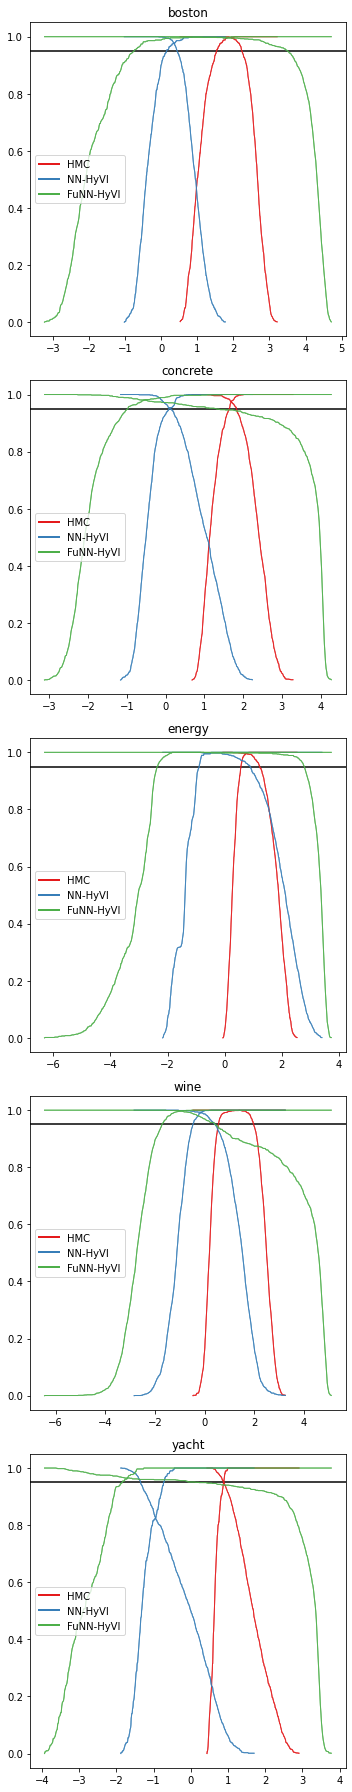

In [18]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=3
fig,ax=plt.subplots(n_datasets,1,figsize=(5,25))

custom_lines = [Line2D([0], [0], color=cmap(m), lw=2) for m in range(n_methods)]
custom_text=methods

nb_splits=3
d=0
methods=[]
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for split_nb in range(nb_splits):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            #ax[d].plot(FNR.cpu(),TPR.cpu(), label=method)        #ROC
            ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, lw=1, color=cmap(m), alpha=0.6)
            ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, lw=1, color=cmap(m), alpha=0.6)
        m+=1
        methods.append(method)
    ax[d].hlines([0.95], 0, 1, transform=ax[d].get_yaxis_transform(), colors='black')
    ax[d].set_title(dataset)
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')

    d+=1

#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png', bbox_inches='tight')
fig.savefig("Results/Exp1/TPRvsFNR_exp1.pdf", bbox_inches='tight', dpi=600)

plt.show()

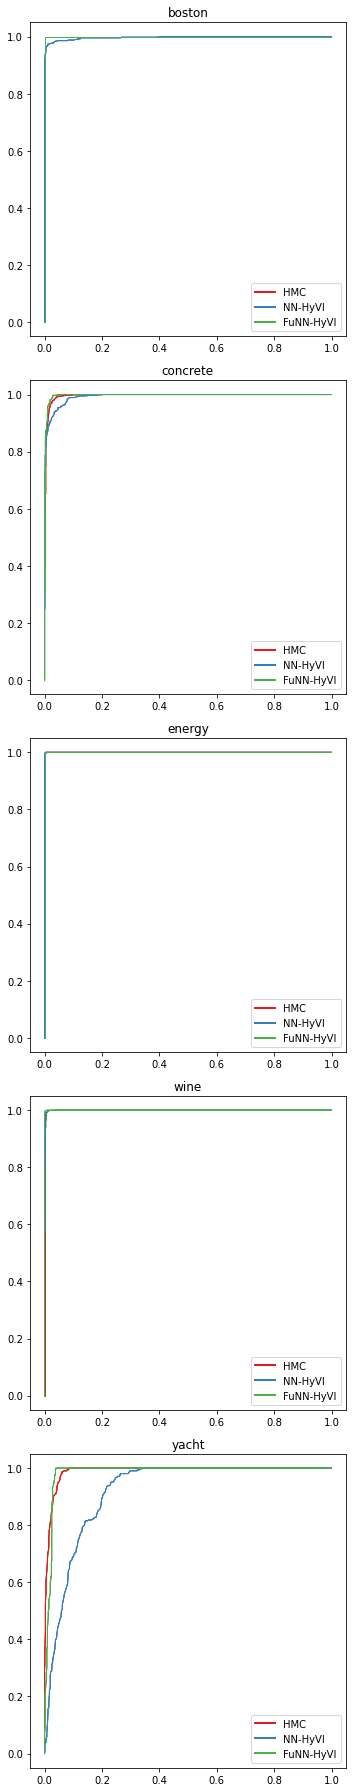

In [21]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=3
fig,ax=plt.subplots(n_datasets,1,figsize=(5,25))

custom_lines = [Line2D([0], [0], color=cmap(m), lw=2) for m in range(n_methods)]
custom_text=methods

nb_split=0
d=0
methods=[]
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for split_nb in range(nb_splits):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            ax[d].plot(FNR.cpu(),TPR.cpu(), label=method, lw=1, color=cmap(m))        #ROC
        m+=1
        methods.append(method)
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    d+=1

#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png', bbox_inches='tight')
fig.savefig("Results/Exp1/ROC_Exp1.pdf", bbox_inches='tight', dpi=600)

plt.show()

## Entropy of posterior distribution ## 

In [18]:
H=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_post_entropy.pt')


In [19]:
methods=['HMC','NN-HyVI','FuNN-HyVI']
metrics=['paramH','funH']#
index_p=pd.MultiIndex.from_product([methods,['paramH']])
index_f=pd.MultiIndex.from_product([methods,['funH']])
df_p=pd.DataFrame(H[0], index=index_p).transpose()
df_f=pd.DataFrame(H[0], index=index_f).transpose()

df_p_std=pd.DataFrame(H[1], index=index_p).transpose()
df_f_std=pd.DataFrame(H[1], index=index_f).transpose()


In [20]:
df=df_p
df_std=df_p_std
index=index_p
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [21]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &     NN-HyVI &     FuNN-HyVI \\
{} &     paramH &      paramH &        paramH \\
\midrule
boston   &  971.0±0.0 &  1538.0±5.0 &    393.0±24.0 \\
concrete &  635.0±0.0 &  1090.0±7.0 &    433.0±15.0 \\
energy   &  628.0±0.0 &  1086.0±7.0 &    199.0±23.0 \\
wine     &  611.0±1.0 &  1431.0±4.0 &  -1536.0±49.0 \\
yacht    &  502.0±0.0 &   767.0±6.0 &     86.0±72.0 \\
\bottomrule
\end{tabular}



In [22]:
df=df_f
df_std=df_f_std
index=index_f
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [23]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &      NN-HyVI &  FuNN-HyVI \\
{} &        funH &         funH &       funH \\
\midrule
boston   &   -52.0±0.0 &   -393.0±2.0 &  316.0±7.0 \\
concrete &  -107.0±1.0 &   -433.0±5.0 &  270.0±3.0 \\
energy   &  -225.0±0.0 &  -265.0±11.0 &  144.0±6.0 \\
wine     &   -25.0±0.0 &   -278.0±8.0 &  272.0±5.0 \\
yacht    &  -244.0±0.0 &   -653.0±6.0 &  99.0±18.0 \\
\bottomrule
\end{tabular}



## kl divergence results ##

In [24]:
DIV, PDIV=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_kldiv.pt')


In [25]:
methods=['NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['KL(-,HMC)','KL(HMC,-)','KL(-,-)']
index=pd.MultiIndex.from_product([methods,metrics])

div=pd.DataFrame(DIV[0], index=index).transpose()
pdiv=pd.DataFrame(PDIV[0],index=index).transpose()
div_=pd.DataFrame(DIV[1], index=index).transpose()
pdiv_=pd.DataFrame(PDIV[1],index=index).transpose()
Div=div
Div_=div_

In [26]:
lat=Div.copy()

In [27]:
for i in Div.columns:
    lat[i] = Div[i].round(1).astype(str)+ "±" + ((Div_[i]/np.sqrt(3)).round(1)).astype(str)+""

In [28]:
print(lat.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{NN-HyVI} & \multicolumn{3}{l}{FuNN-HyVI} \\
{} &   KL(-,HMC) &   KL(HMC,-) &    KL(-,-) &   KL(-,HMC) &  KL(HMC,-) &   KL(-,-) \\
\midrule
boston   &    25.8±0.5 &   242.7±1.6 &   20.2±0.8 &   301.4±6.7 &  -20.3±2.2 &  17.3±4.1 \\
concrete &     6.4±1.6 &   248.4±6.3 &   16.3±5.2 &   309.2±2.8 &  -32.9±0.9 &   6.8±2.3 \\
energy   &    90.9±7.8 &   142.1±2.0 &   28.0±1.9 &   300.0±5.7 &  -22.0±1.0 &  14.9±2.3 \\
wine     &  142.6±11.5 &  396.8±21.6 &  382.2±9.1 &  241.9±12.5 &   82.3±2.9 &  40.4±3.4 \\
yacht    &    25.2±1.0 &   323.7±5.8 &   35.6±6.8 &  277.6±17.1 &   -4.0±6.8 &  39.9±6.4 \\
\bottomrule
\end{tabular}



# Experiment 2 #

## small

In [7]:
RESULTS, STDS=torch.load('Results/Exp2/UCI_small_Exp2_2020-11-03-03:13_metrics.pt')

for key in RESULTS.keys():
    print(key)

boston
concrete
energy
wine
yacht


In [8]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [9]:
res=pd.DataFrame(RESULTS).transpose()

In [10]:
stds=pd.DataFrame(STDS).transpose()

In [11]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']


In [13]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{llllllll}
\toprule
{} &  McDropOut &   Ensemble &       MFVI &  FuNN-MFVI &    NN-HyVI &  FuNN-HyVI &       FBNN \\
{} &       RMSE &       RMSE &       RMSE &       RMSE &       RMSE &       RMSE &       RMSE \\
\midrule
boston   &  0.37±0.03 &   0.4±0.03 &  0.44±0.04 &  0.45±0.04 &  0.42±0.04 &  0.53±0.06 &  2.38±0.03 \\
concrete &   0.3±0.01 &  0.24±0.01 &   0.3±0.01 &  0.28±0.01 &  0.27±0.01 &  0.28±0.01 &  4.93±0.06 \\
energy   &  0.14±0.01 &   0.04±0.0 &   0.05±0.0 &   0.04±0.0 &   0.04±0.0 &   0.04±0.0 &  0.41±0.01 \\
wine     &  0.79±0.02 &   0.8±0.02 &   0.8±0.02 &  0.95±0.04 &   0.9±0.03 &  1.02±0.03 &   0.67±0.0 \\
yacht    &  0.06±0.01 &   0.04±0.0 &  0.08±0.01 &  0.05±0.01 &   0.04±0.0 &  0.06±0.01 &  0.61±0.02 \\
\bottomrule
\end{tabular}



In [14]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{llllllll}
\toprule
{} &   McDropOut &    Ensemble &        MFVI &    FuNN-MFVI &     NN-HyVI &    FuNN-HyVI &        FBNN \\
{} &         LPP &         LPP &         LPP &          LPP &         LPP &          LPP &         LPP \\
\midrule
boston   &  -0.46±0.14 &   -2.0±0.25 &  -0.71±0.18 &   -8.36±1.44 &  -1.82±0.44 &  -11.65±4.83 &   -2.3±0.01 \\
concrete &  -0.21±0.02 &  -2.54±0.66 &  -0.27±0.04 &    -0.7±0.16 &    -0.3±0.1 &   -0.65±0.18 &   -3.1±0.01 \\
energy   &    0.2±0.01 &   0.49±0.27 &   1.59±0.04 &    1.44±0.15 &   1.76±0.09 &    1.55±0.09 &  -0.68±0.01 \\
wine     &   -2.26±0.1 &  -2.67±0.41 &   -1.2±0.03 &   -2.12±0.12 &  -1.56±0.07 &   -2.29±0.11 &   -1.04±0.0 \\
yacht    &   0.41±0.01 &   1.66±0.34 &   1.08±0.11 &  -14.13±6.87 &   1.82±0.17 &    0.02±0.61 &  -1.03±0.01 \\
\bottomrule
\end{tabular}



In [15]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} & McDropOut &   Ensemble &        MFVI &   FuNN-MFVI &     NN-HyVI &   FuNN-HyVI \\
{} &  time [s] &   time [s] &    time [s] &    time [s] &    time [s] &    time [s] \\
\midrule
boston   &  11.0±0.0 &  190.0±1.0 &   155.0±7.0 &   201.0±7.0 &    82.0±2.0 &   141.0±5.0 \\
concrete &  17.0±0.0 &  365.0±1.0 &   296.0±4.0 &   288.0±9.0 &   148.0±4.0 &  245.0±10.0 \\
energy   &  13.0±0.0 &  271.0±1.0 &   216.0±3.0 &   202.0±8.0 &   100.0±4.0 &  222.0±12.0 \\
wine     &  25.0±0.0 &  561.0±2.0 &  398.0±10.0 &  502.0±13.0 &  304.0±11.0 &  472.0±13.0 \\
yacht    &   9.0±0.0 &  116.0±0.0 &    84.0±2.0 &   100.0±4.0 &    48.0±2.0 &    77.0±5.0 \\
\bottomrule
\end{tabular}



## Predictive Epistemic Entropy #

In [8]:
Entropy=torch.load('Results/Exp2/UCI_small_Exp2_2020-11-03-03:13_entropy.pt')

In [9]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


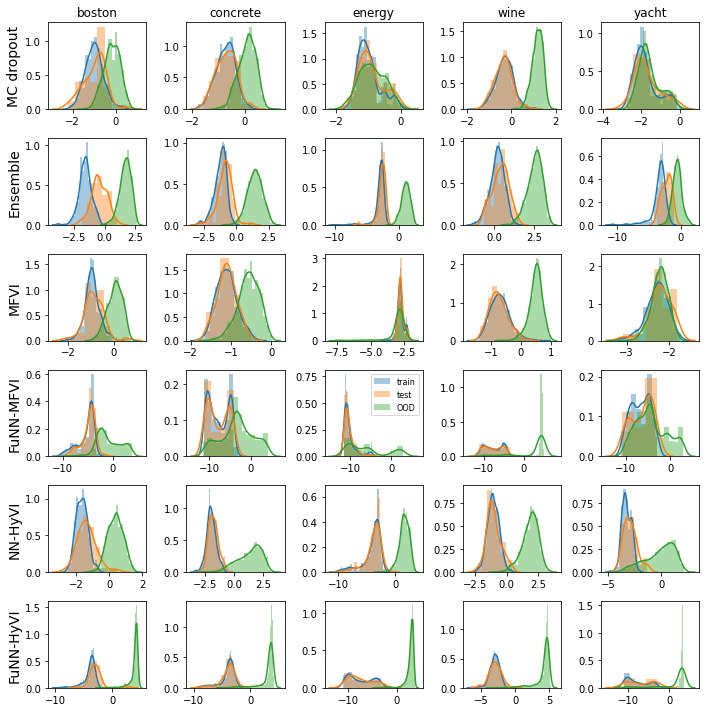

In [10]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=5

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [13]:
Entropy=torch.load('Results/NEW/UCI_small_Exp22020-10-21-00:34_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


In [14]:
import copy
TPRs=copy.deepcopy(Entropy)
FNRs=copy.deepcopy(Entropy)
THRESHs=copy.deepcopy(Entropy)
FNRfor95perc=copy.deepcopy(Entropy)

In [15]:
import numpy as np
nb_splits=10
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        TPR=[] #on in-distirbution
        FNR=[] #on OOD
        THRESH=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            H_pos=torch.cat([H[0],H[1]])
            thresholds=torch.linspace(H[0].min().item(),H[2].max().item(),500).to(device)
            TruePositive=(H_pos < thresholds.unsqueeze(-1)).sum(1).true_divide(len(H_pos))
            FalseNegative=(H[2] < thresholds.unsqueeze(-1)).sum(1).true_divide(len(H[2]))
            TPR.append(TruePositive)
            FNR.append(FalseNegative)
            THRESH.append(thresholds)
        TPRs[dataset][method]=TPR
        FNRs[dataset][method]=FNR#
        THRESHs[dataset][method]=THRESH#

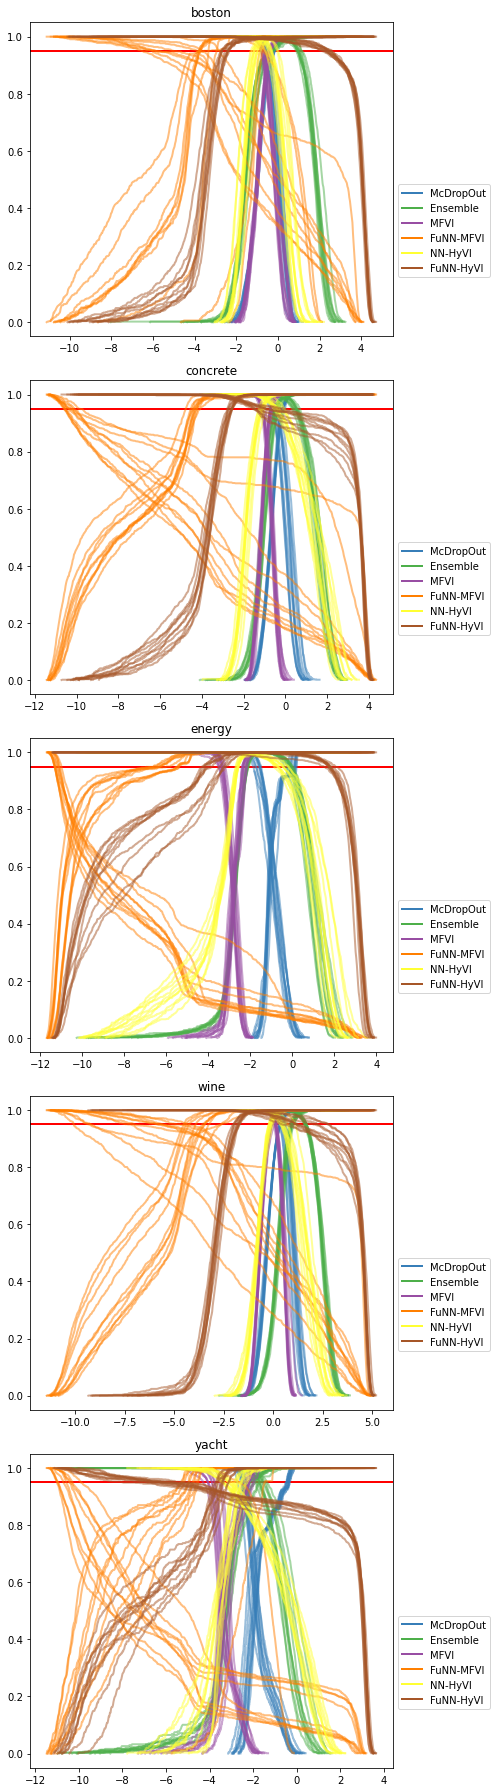

In [16]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(n_datasets,1,figsize=(7,25))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
custom_text=methods

nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for nb_split in range(10):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            #ax[d].plot(FNR.cpu(),TPR.cpu(), label=method)        #ROC
            ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, lw=2,color=cmap(m+1), alpha=0.5)
            ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, lw=2, color=cmap(m+1), alpha=0.5)
        ax[d].hlines([0.95], 0, 1, transform=ax[d].get_yaxis_transform(), colors='red')
        m+=1
    ax[d].set_title(dataset)
    lgd = ax[d].legend(custom_lines, custom_text, loc='best', bbox_to_anchor=(1,0.5))

    d+=1

#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png', bbox_inches='tight')
fig.savefig("Results/Exp2/FNRvsTPR.pdf", bbox_inches='tight', dpi=600)

plt.show()

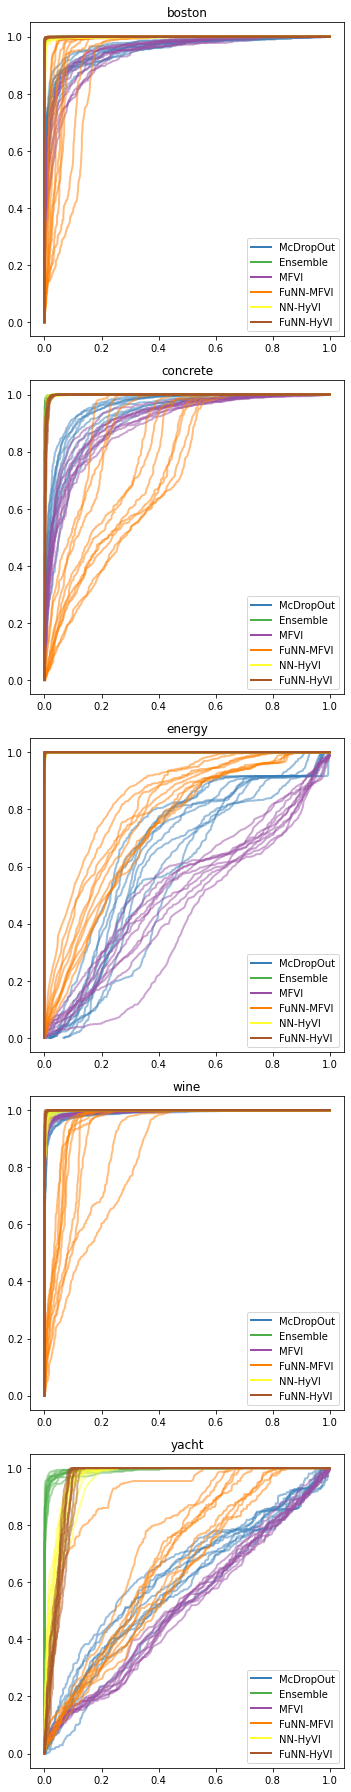

In [17]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(n_datasets,1,figsize=(5,25))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
custom_text=methods
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for nb_split in range(10):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            ax[d].plot(FNR.cpu(),TPR.cpu(), label=method, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

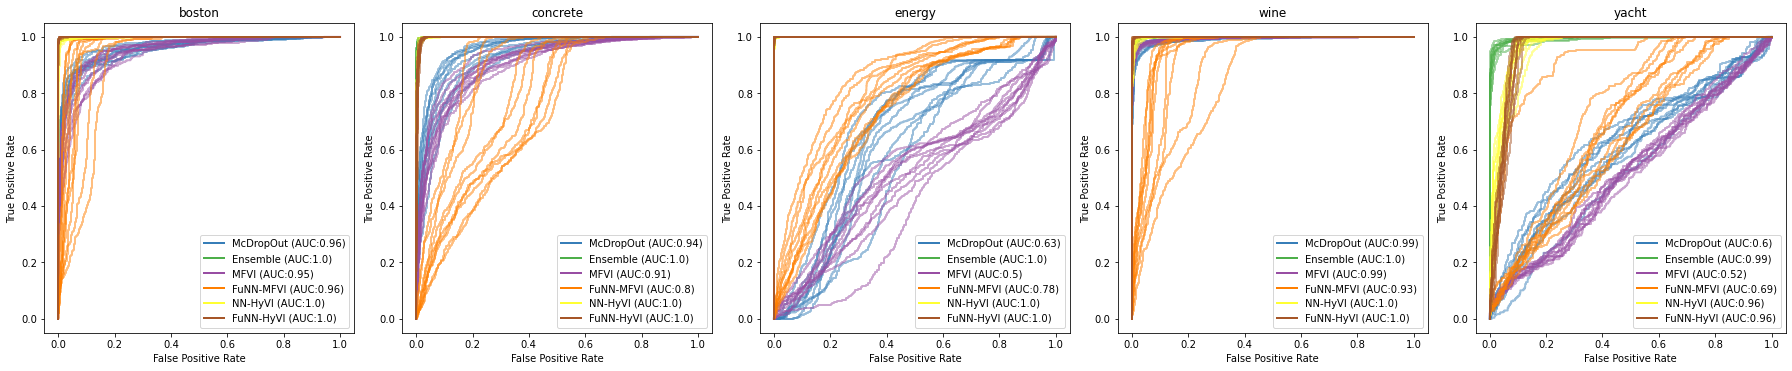

In [33]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu())
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

## ROC AUC 

In [69]:
import copy
AUC=copy.deepcopy(Entropy)


In [70]:
import numpy as np
from sklearn.metrics import roc_auc_score
nb_splits=10
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        AUCs=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            AUCs.append(roc_auc_score(y_true.cpu(),y_score.cpu()))
        AUC[dataset][method]=np.mean(AUCs)
  

In [71]:
pd.options.display.precision=3
df=pd.DataFrame(AUC).transpose().round(3)
df.style.highlight_max(axis=1)

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
boston,0.960,1.000,0.950,0.957,0.999,1.000
concrete,0.942,0.999,0.909,0.798,0.998,0.997
energy,0.634,1.000,0.503,0.777,1.000,1.000
wine,0.993,0.999,0.994,0.929,0.999,1.000
yacht,0.598,0.995,0.519,0.692,0.963,0.955


# Exp 2 large

In [18]:
RESULTS, STDS=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-05-15:41_metrics.pt')

for key in RESULTS.keys():
    print(key)

kin8nm
navalC
powerplant
protein


In [19]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [20]:
res=pd.DataFrame(RESULTS).transpose()

In [21]:
stds=pd.DataFrame(STDS).transpose()

In [22]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']
res

Ensemble                                 McDropOut            \
                RMSE       LPP    time [s] std noise      RMSE       LPP   
kin8nm      0.281772 -3.573148  141.074427       0.0  0.294445 -0.129017   
navalC           NaN       NaN         NaN       NaN       NaN       NaN   
powerplant       NaN       NaN         NaN       NaN       NaN       NaN   
protein          NaN       NaN         NaN       NaN       NaN       NaN   

                                   NN-HyVI            ...      MFVI            \
              time [s] std noise      RMSE       LPP  ...      RMSE       LPP   
kin8nm      114.444128  0.254073  0.280238 -0.153991  ...  0.295525 -0.198442   
navalC             NaN       NaN       NaN       NaN  ...       NaN       NaN   
powerplant         NaN       NaN       NaN       NaN  ...       NaN       NaN   
protein            NaN       NaN       NaN       NaN  ...       NaN       NaN   

                                 FuNN-MFVI                                  \
              time [s] std noise      RMSE       LPP    time [s] std noise   
kin8nm      252.752001   0.27884  0.281204 -0.172506  188.804748  0.236672   
navalC             NaN       NaN       NaN       NaN         NaN       NaN   
powerplant         NaN       NaN       NaN       NaN         NaN       NaN   
protein            NaN       NaN       NaN       NaN         NaN       NaN   

               FBNN         
               RMSE    LPP  
kin8nm          NaN    NaN  
navalC      0.00012  7.130  
powerplant      NaN    NaN  
protein     4.32600 -2.892  

[4 rows x 26 columns]

In [25]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(5)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_min(axis=1)    
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
kin8nm,0.294445,0.281772,0.295525,0.281204,0.280238,0.264587,nan
navalC,nan,nan,nan,nan,nan,nan,0.000120
powerplant,nan,nan,nan,nan,nan,nan,nan
protein,nan,nan,nan,nan,nan,nan,4.326000


In [18]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_max(axis=1)        
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,LPP,LPP,LPP,LPP,LPP,LPP,LPP
kin8nm,-0.175882,-2.877862,-0.193863,-0.150703,-0.135818,-0.134512,nan
navalC,0.413332,1.227227,1.967930,2.412996,2.976301,3.059095,7.130000
powerplant,0.001875,-58.176300,0.045260,0.056890,0.065847,0.057579,nan
protein,nan,nan,-1.042385,-1.019619,-1.023146,-1.021117,-2.892000


In [13]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &  McDropOut &   Ensemble &        MFVI &    FuNN-MFVI &     NN-HyVI &    FuNN-HyVI \\
{} &   time [s] &   time [s] &    time [s] &     time [s] &    time [s] &     time [s] \\
\midrule
kin8nm     &  115.0±0.0 &  144.0±0.0 &   541.0±0.0 &    432.0±4.0 &   289.0±7.0 &   368.0±18.0 \\
navalC     &  169.0±0.0 &  211.0±1.0 &   982.0±0.0 &  1215.0±75.0 &  545.0±24.0 &  1087.0±29.0 \\
powerplant &  136.0±0.0 &  170.0±0.0 &  499.0±17.0 &   432.0±14.0 &   245.0±6.0 &   396.0±11.0 \\
protein    &    nan±nan &    nan±nan &     nan±nan &      nan±nan &     nan±nan &      nan±nan \\
\bottomrule
\end{tabular}



## large : Predictive Epistemic Entropy #

In [26]:
Entropy=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-03-22:17_entropy.pt')

In [27]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['kin8nm', 'navalC', 'powerplant', 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


TypeError: 'float' object is not subscriptable

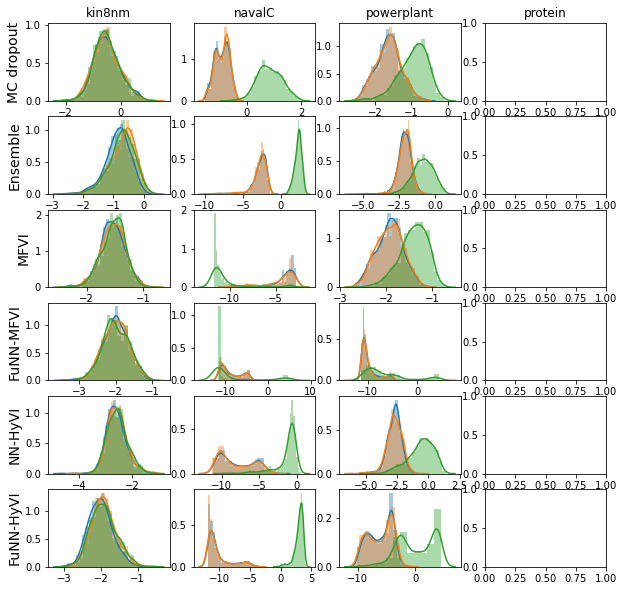

In [28]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=100
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=0

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [59]:
Entropy=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-03-22:17_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']

datasets=['kin8nm', 'navalC', 'powerplant']#, 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


In [60]:
import copy
TPRs=copy.deepcopy(Entropy)
FNRs=copy.deepcopy(Entropy)
THRESHs=copy.deepcopy(Entropy)
FNRfor95perc=copy.deepcopy(Entropy)

In [61]:
import numpy as np
nb_splits=5
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        TPR=[] #on in-distirbution
        FNR=[] #on OOD
        THRESH=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            H_pos=torch.cat([H[0],H[1]])
            thresholds=torch.linspace(H[0].min().item(),H[2].max().item(),500).to(device)
            TruePositive=(H_pos < thresholds.unsqueeze(-1)).sum(1).true_divide(len(H_pos))
            FalseNegative=(H[2] < thresholds.unsqueeze(-1)).sum(1).true_divide(len(H[2]))
            TPR.append(TruePositive)
            FNR.append(FalseNegative)
            THRESH.append(thresholds)
        TPRs[dataset][method]=TPR
        FNRs[dataset][method]=FNR#
        THRESHs[dataset][method]=THRESH#

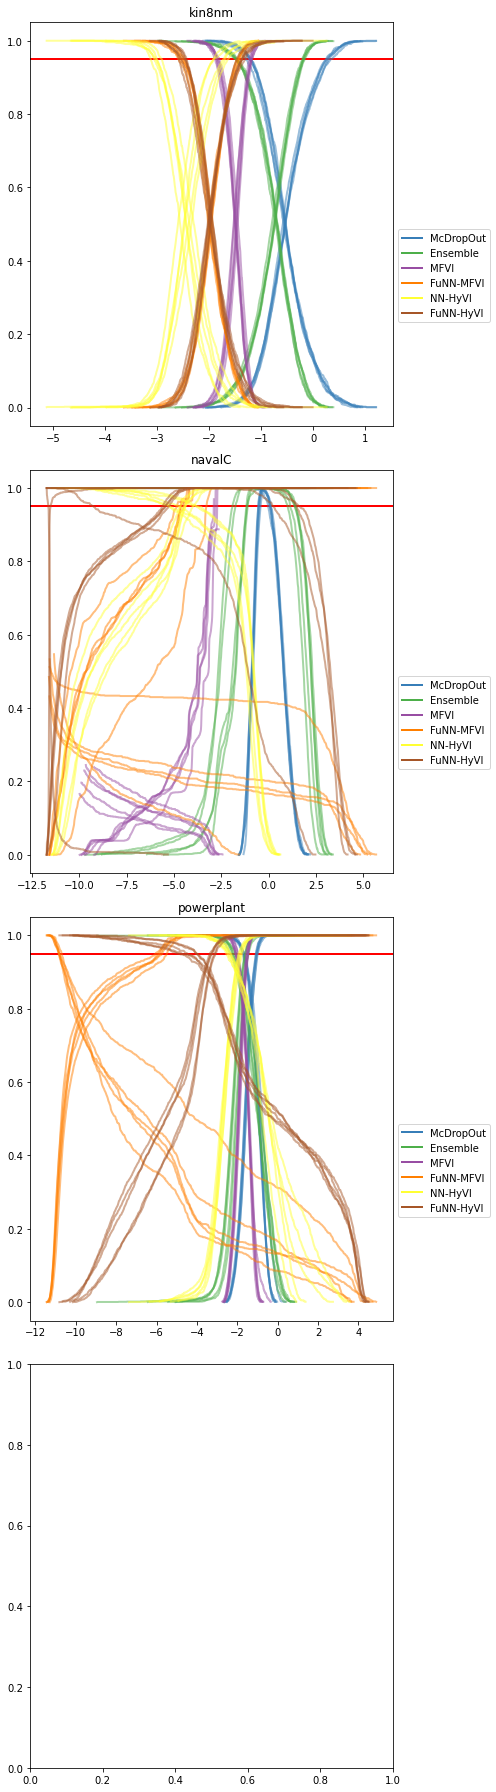

In [62]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(n_datasets,1,figsize=(7,25))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
custom_text=methods

nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for nb_split in range(5):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            #ax[d].plot(FNR.cpu(),TPR.cpu(), label=method)        #ROC
            ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, lw=2,color=cmap(m+1), alpha=0.5)
            ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, lw=2, color=cmap(m+1), alpha=0.5)
        ax[d].hlines([0.95], 0, 1, transform=ax[d].get_yaxis_transform(), colors='red')
        m+=1
    ax[d].set_title(dataset)
    lgd = ax[d].legend(custom_lines, custom_text, loc='best', bbox_to_anchor=(1,0.5))

    d+=1

#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png', bbox_inches='tight')
fig.savefig("Results/Exp2/FNRvsTPR.pdf", bbox_inches='tight', dpi=600)

plt.show()

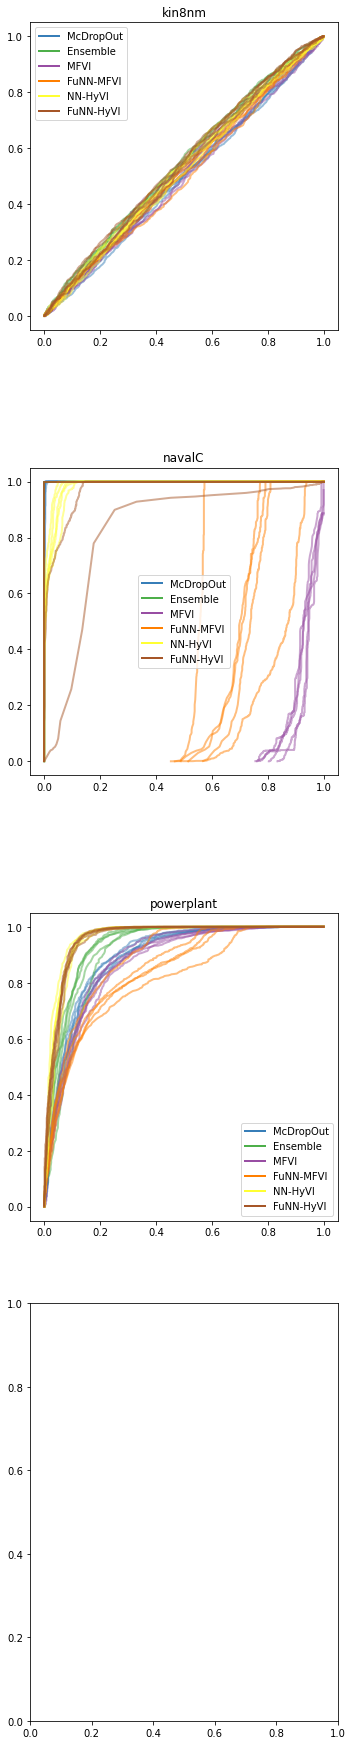

In [63]:
import seaborn as sns
from pylab import *
import seaborn as sb
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(n_datasets,1,figsize=(5,25))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
custom_text=methods
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    for method, Hs in dic.items():
        for nb_split in range(5):
            TPR=TPRs[dataset][method][nb_split]
            FNR=FNRs[dataset][method][nb_split]
            thresh=THRESHs[dataset][method][nb_split]
            ax[d].plot(FNR.cpu(),TPR.cpu(), label=method, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

## ROC AUC 

In [78]:
import copy
AUC=copy.deepcopy(Entropy)


In [79]:
import numpy as np
from sklearn.metrics import roc_auc_score
nb_splits=5
for dataset, dic in Entropy.items():
    for method, Hs in dic.items():
        AUCs=[]
        for split_nb in range(nb_splits):
            H=Hs[split_nb]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            AUCs.append(roc_auc_score(y_true.cpu(),y_score.cpu()))
        AUC[dataset][method]=np.mean(AUCs).round(3)#, np.std(AUCs).round(3)
  

In [80]:
pd.options.display.precision=4
df=pd.DataFrame(AUC).transpose().round(4)
df.style.highlight_max(axis=1)

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
kin8nm,0.5010,0.5410,0.5080,0.5110,0.5260,0.5380
navalC,1.0000,1.0000,0.0650,0.2970,0.9860,0.9600
powerplant,0.8910,0.9230,0.8770,0.8450,0.9590,0.9570


# Synthetic Data Set: Wave OOS #

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

x_pred=torch.linspace(-4.,2.,500).unsqueeze(-1).to(device)

setup_ = get_setup('foong')
setup=setup_.Setup(device) 


x_train, y_train=setup.train_data()

def PlotFoong(ax, method, y_pred, x_pred=x_pred,  x=x_train, y=y_train, device=device):
 
    parameters = {'axes.labelsize':18,
                  'axes.titlesize': 18,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15,
                  'figure.titlesize':14}


    plt.rcParams.update(parameters)
    
    N=y_pred.shape[0]
    m_3=int(0.001*N)
    M_3=N-m_3
    m_2=int(0.021*N)
    M_2=N-m_2
    m_1=int(0.136*N)
    M_1=N-m_1

    x_pred=x_pred.squeeze()

    pred,_=y_pred.sort(dim=0)
    y_mean=y_pred.mean(dim=0).squeeze().cpu()
    y_3=pred[m_3,:].squeeze().cpu()
    Y_3=pred[M_3,:].squeeze().cpu()
    y_2=pred[m_2,:].squeeze().cpu()
    Y_2=pred[M_2,:].squeeze().cpu()    
    y_1=pred[m_1,:].squeeze().cpu()
    Y_1=pred[M_1,:].squeeze().cpu()

    

    ax.plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan')
    color='springgreen'#'darkgreen'#'dodgerblue'#
#    ax.fill_between(x_pred.cpu(), y_3, Y_3, facecolor=color, alpha=0.3)
#    ax.fill_between(x_pred.cpu(), y_2, Y_2, facecolor=color, alpha=0.2)
#    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor=color, alpha=0.1)
    
    ax.fill_between(x_pred.cpu(), Y_2, Y_3, facecolor='springgreen', alpha=0.2)
    ax.fill_between(x_pred.cpu(), Y_1, Y_2, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor='springgreen', alpha=0.7)
    ax.fill_between(x_pred.cpu(), y_2, y_1, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_3, y_2, facecolor='springgreen', alpha=0.2)

    ax.set_yticks([-3,0,3])
    ax.set_xticks([-3,-2,-1,0,1])
    ax.grid(True, which='major', linewidth=0.5)
    ax.set_ylim(-5, 5)
    ax.set_xlim(-4.,2.)
    if method == 'NN-HyVI' or method =='FuNN-HyVI':
        ax.set_title(method, {'fontweight':'bold'})
    else:
        ax.set_title(method)
    ax.scatter(x.cpu(), y.cpu() , marker='.',linewidth=.5, color='black',zorder=4)
    ax.plot(x_pred.cpu(), y_mean, color='darkgreen', linewidth=1.)

    return fig


In [42]:
x_pred,Wave=torch.load('Results/NEW/WaveOOD_2020-10-22-00:49.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'HMC']
#df=pd.DataFrame(Wave,index=methods)

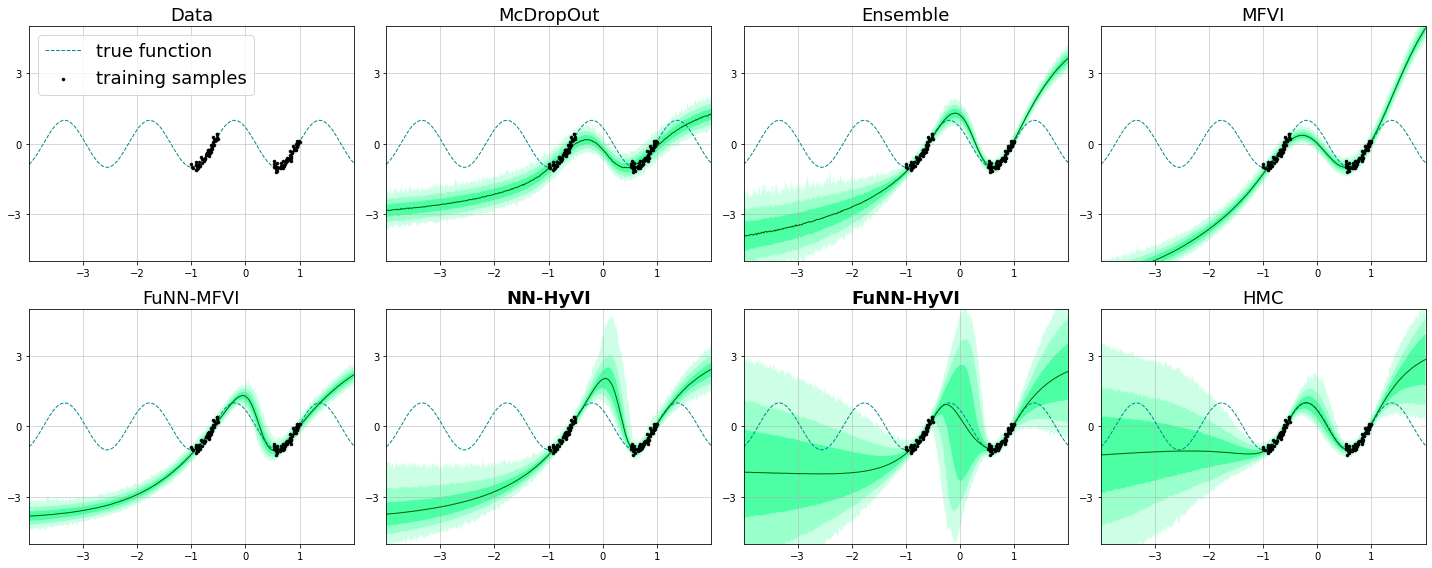

In [43]:
from pylab import *
fig, ax=plt.subplots(2,4, figsize=(20,8))


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','HMC','FuNN-HyVI']


parameters = {'axes.labelsize':18,
              'axes.titlesize': 18,
              'xtick.labelsize' : 18,
              'ytick.labelsize' : 18,
              'figure.titlesize':14}

plt.rcParams.update(parameters)

ax.flat[0].plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan', label='true function')

ax.flat[0].set_yticks([-3,0,3])
ax.flat[0].set_xticks([-3,-2,-1,0,1])
ax.flat[0].grid(True, which='major', linewidth=0.5)
ax.flat[0].set_ylim(-5, 5)
ax.flat[0].set_xlim(-4.,2.)
ax.flat[0].set_title('Data')
ax.flat[0].scatter(x_train.cpu(), y_train.cpu() , marker='.', linewidth=.5,  label='training samples',color='black',zorder=4)
ax.flat[0].legend(loc='upper left', prop={'size': 18})
i=1
for method in methods:
    y=Wave[method]
    PlotFoong(ax.flat[i],method,y, x_pred=x_pred)
    i+=1

fig.tight_layout()#h_pad=3., w_pad=3.)
plt.savefig('Results/NEW/WAVE.pdf', dpi=600)


# Isotropic Gaussian example #

In [44]:
from torch.distributions import MultivariateNormal as MV

N=200
#certain=MV(torch.zeros(N), covariance_matrix=0.1*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=.1*torch.eye(N))
sigmas=torch.linspace(0.03, .35, 20)
uTm=torch.Tensor(20)
cTm=torch.Tensor(20)
mTu=torch.Tensor(20)
mTc=torch.Tensor(20)
for i in range(20):
    middle=MV(torch.zeros(N), covariance_matrix=sigmas[i]*torch.eye(N))
    uTm[i]=torch.distributions.kl.kl_divergence(uncertain,middle)
#    cTm[i]=torch.distributions.kl.kl_divergence(certain,middle)
    mTu[i]=torch.distributions.kl.kl_divergence(middle,uncertain)
#    mTc[i]=torch.distributions.kl.kl_divergence(middle,certain)


In [45]:
uTm, cTm

(tensor([1.1294e+02, 3.7644e+01, 1.1901e+01, 2.5244e+00, 3.5950e-02, 8.4497e-01,
         3.3481e+00, 6.7487e+00, 1.0621e+01, 1.4725e+01, 1.8920e+01, 2.3124e+01,
         2.7286e+01, 3.1376e+01, 3.5377e+01, 3.9279e+01, 4.3078e+01, 4.6771e+01,
         5.0360e+01, 5.3848e+01]),
 tensor([1.0089e-43, 0.0000e+00, 1.2948e-42, 0.0000e+00, 2.0039e-43, 0.0000e+00,
         1.2948e-42, 0.0000e+00, 2.0039e-43, 0.0000e+00, 2.0921e-42, 0.0000e+00,
         2.6765e-43, 0.0000e+00, 2.0921e-42, 0.0000e+00, 2.6765e-43, 0.0000e+00,
         0.0000e+00, 0.0000e+00]))

In [46]:
from pylab import *
import matplotlib.pyplot as plt

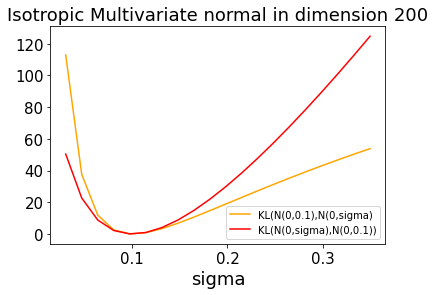

In [47]:
plt.plot(sigmas,uTm, label='KL(N(0,0.1),N(0,sigma)', color='orange')
plt.plot(sigmas,mTu, label='KL(N(0,sigma),N(0,0.1))',color='red')

#plt.plot(sigmas,cTm, label='KL(N(0,0.1),N(0,sigma))',color='blue')
#plt.plot(sigmas,mTc, label='KL(N(0,sigma),N(0,0.1))', color='green')

plt.xlabel('sigma')
plt.title('Isotropic Multivariate normal in dimension {}'.format(N))
plt.legend()

In [48]:
from torch.distributions import MultivariateNormal as MV

N=200
small=0.1
medium=0.5
large=2.
certain=MV(torch.zeros(N), covariance_matrix=small*torch.eye(N))
middle=MV(torch.zeros(N), covariance_matrix=medium*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=large*torch.eye(N))
print('KL(N(0,large*I),N(0,medium*I): {}'.format(torch.distributions.kl.kl_divergence(uncertain,middle)))
print('KL(N(0,sigma),N(0,1)): {}'.format(torch.distributions.kl.kl_divergence(middle,uncertain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(uncertain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,uncertain)))
print('KL(N(0,0.1),N(0,sigma)): {}'.format(torch.distributions.kl.kl_divergence(certain,middle)))
print('KL(N(0,sigma),N(0,0.1)): {}'.format(torch.distributions.kl.kl_divergence(middle,certain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(certain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,certain)))

KL(N(0,large*I),N(0,medium*I): 161.37054443359375
KL(N(0,sigma),N(0,1)): 63.629425048828125
mean: 112.49998474121094
KL(N(0,0.1),N(0,sigma)): 80.94381713867188
KL(N(0,sigma),N(0,0.1)): 239.05618286132812
mean: 160.0
